## 1. **Business Understanding**

### Overview

SentimentFlow aims to address a real-world problem related to understanding public sentiment towards Apple and Google products on Twitter. The stakeholders include companies, marketing teams, and decision-makers who want to gauge public opinion and make informed strategic decisions based on social media sentiment.

### Problem Statement

The problem is to accurately classify the sentiment of tweets related to Apple and Google products. We want to determine whether a tweet expresses a positive, negative, or neutral sentiment. This classification can help companies understand customer satisfaction, identify potential issues, and tailor their responses accordingly.

### Stakeholders

1. **Companies (Apple and Google):** These organizations are directly impacted by public sentiment. They want to monitor how their products are perceived and identify areas for improvement.

2. **Marketing Teams:** Marketing teams can use sentiment analysis to adjust their campaigns, respond to negative feedback, and highlight positive aspects of their products.

3. **Decision-Makers:** Executives and managers need insights into public sentiment to make informed decisions about product development, customer support, and brand reputation.

### Value Proposition

By accurately classifying tweets, our NLP model can provide actionable insights to stakeholders. For example:
- Identifying negative sentiment can help companies address issues promptly.
- Recognizing positive sentiment can guide marketing efforts and reinforce successful strategies.
- Understanding neutral sentiment can provide context and balance.

### Objectives

Main Objective

> To develop a NLP (Natural Language Processing) multiclass classification model for sentiment analysis, aim to achieve a recall score of 85% and an accuracy of 90%. The model should categorize sentiments into three classes: Positive, Negative, and Neutral.

Specific Objectives

* To idenitfy the most common words used in the dataset using Word cloud.

* To confirm the most common words that are positively and negatively tagged.

* To recognize the products that have been opined by the users.

* To spot the distribution of the sentiments.

### Conclusion

Our NLP model will contribute valuable insights to the real-world problem of understanding Twitter sentiment about Apple and Google products. Stakeholders can leverage this information to enhance their decision-making processes and improve overall customer satisfaction.

## 2. **Data Understanding**

### Data Sources
The dataset originates from CrowdFlower via data.world. Contributors evaluated tweets related to various brands and products. Specifically:
- Each tweet was labeled as expressing positive, negative, or no emotion toward a brand or product.
- If emotion was expressed, contributors specified which brand or product was the target.

### Suitability of Data
Here's why this dataset is suitable for our project:
1. **Relevance:** The data directly aligns with our business problem of understanding Twitter sentiment for Apple and Google products.
2. **Real-World Context:** The tweets represent actual user opinions, making the problem relevant in practice.
3. **Multiclass Labels:** We can build both binary (positive/negative) and multiclass (positive/negative/neutral) classifiers using this data.

### Dataset Size
The dataset contains over 9,000 labeled tweets. We'll explore its features to gain insights.

### Descriptive Statistics
- **tweet_text:** The content of each tweet.
- **is_there_an_emotion_directed_at_a_brand_or_product:** No emotion toward brand or product, Positive emotion, Negative emotion, I can't tell
- **emotion_in_tweet_is_directed_at:** The brand or product mentioned in the tweet.

### Feature Inclusion
Tweet text is the primary feature. The emotion label and target brand/product are essential for classification.

### Limitations
- **Label Noise:** Human raters' subjectivity may introduce noise.
- **Imbalanced Classes:** We'll address class imbalance during modeling.
- **Contextual Challenges:** Tweets are often short and context-dependent.
- **Incomplete & Missing Data:** Could affect the overall performance of the models.

## 3. **Data Loading**

In [1]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### ***Class Creation***

In [2]:
class DataUnderstanding():
    """Class that gives the data understanding of a dataset"""
    def __init__(self, data='None'):
        """Initialisation"""
        self.df = data
        
    def load_data(self, path):
        """Loading the data"""
        if self.df == 'None':
            self.df = pd.read_csv(path, encoding='latin-1')
        return self.df
    
    def understanding(self):
        # Info
        print("""INFO""")
        print("-"*4)
        self.df.info()
        
        # Shape
        print("""\n\nSHAPE""")
        print("-"*5)
        print(f"Records in dataset are {self.df.shape[0]} with {self.df.shape[1]} columns.")
        
        # Columns
        print("\n\nCOLUMNS")
        print("-"*6)
        print(f"Columns in the dataset are:")
        for idx in self.df.columns:
            print(f"- {idx}")
        
        # Unique Values
        print("\n\nUNIQUE VALUES")
        print("-"*12)
        for col in self.df.columns:
            print(f"Column *{col}* has {self.df[col].nunique()} unique values")
            if self.df[col].nunique() < 12:
                print(f"Top unique values in the *{col}* include:")
                for idx in self.df[col].value_counts().index:
                    print(f"- {idx}")
            print("")
            
        # Missing or Null Values
        print("""\nMISSING VALUES""")
        print("-"*15)
        for col in self.df.columns:
            print(f"Column *{col}* has {self.df[col].isnull().sum()} missing values.")
            
        # Duplicate Values
        print("""\n\nDUPLICATE VALUES""")
        print("-"*16)
        print(f"The dataset has {self.df.duplicated().sum()} duplicated records.")

### ***Load the data set***

In [3]:
data = DataUnderstanding()
df = data.load_data(path="judge_tweet_product_company.csv")
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
data.understanding()

INFO
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


SHAPE
-----
Records in dataset are 9093 with 3 columns.


COLUMNS
------
Columns in the dataset are:
- tweet_text
- emotion_in_tweet_is_directed_at
- is_there_an_emotion_directed_at_a_brand_or_product


UNIQUE VALUES
------------
Column *tweet_text* has 9065 unique values

Column *emotion_in_tweet_is_directed_at* has 9 unique values
Top unique values in the *emotion_in_tweet_is_directed_at* include:
- iPad
- Apple
- iPad or iPhone App
-

Comments:
- All the columns are in the correct format

- The columns names will need to be changed

- Features with missing values should be renamed from NaN

- Duplicate records should be dropped

- All records with the target as "I can't tell" should be dropped

## 4.0 Data Cleaning

### 4.1. Validity

#### 4.1.1 Corrupted Records in the *tweet_text* Column

The data seems to be corrupted in some records. To correct this issue, we create a function that can find these corrupted records, and returns their indexes. We use this index to remove the record from the working dataframe.

In [5]:
# A function targeting corrupted records
def is_corrupted(tweet):
    """This func returns the index of any record that is corrupted"""
    corrupted_cols = []
    for key, text in enumerate(tweet):
        if any(ord(char) > 127 for char in str(text)) == True:
            corrupted_cols.append(key)
    return corrupted_cols

In [6]:
# Applying the is_corrupted function to find the indexes of the corrupted records
corrupted_records_idx = is_corrupted(df['tweet_text'])

In [7]:
# Test to check if the function worked as intended
df.loc[corrupted_records_idx]['tweet_text'].values[0]

'@mention  - False Alarm: Google Circles Not Coming Now\x89ÛÒand Probably Not Ever? - {link} #Google #Circles #Social #SXSW'

In [8]:
# Drop these records 
df.drop(index=corrupted_records_idx, inplace=True)

In [9]:
# Test to ensure there are no corrupted records left
is_corrupted(df['tweet_text'])

[]

#### 4.1.2. Drop Records where there emotion is not positive, negative or neutral

In [10]:
# Identification of the record
bad_reaction_idx = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell"].index

# Drop the columns
df.drop(index = bad_reaction_idx, inplace=True)

# Test
df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell"]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


#### 4.1.3.Replace Fieldss where there emotion is No emotion toward brand or product to neutral

In [11]:
# Identification of the record
neutral_reaction_idx = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] ==\
                              "No emotion toward brand or product"].index

# Replace the values
df.loc[neutral_reaction_idx, 'is_there_an_emotion_directed_at_a_brand_or_product'] = "Neutral emotion"

# Test
df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == "No emotion toward brand or product"]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


### 4.2. Completeness

#### 4.2.1. Missing Values in the **tweet_text** column

In [12]:
tweet_missing = df[df['tweet_text'].isnull() == True].index
df.loc[tweet_missing]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
6,NaN,NaN,Neutral emotion


In [13]:
# Drop the record
df.drop(index=tweet_missing, inplace=True)

In [14]:
# Check
df[df['tweet_text'].isnull() == True]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


#### 4.2.2. Missing Values in the **emotion_in_tweet_is_directed_at** column

In [15]:
# Find the records with missing values in the 2nd column
df[df['emotion_in_tweet_is_directed_at'].isnull() == True].shape[0]

5331

In [16]:
# List of unique products/ services
products = list(df.emotion_in_tweet_is_directed_at.unique())
products.remove(np.nan) # Removes any np.nan items

def find_product(tweet):
    """This func takes in a tweet and returns the product talked about in the 
    tweet used to fill in the emotion_in_tweet_is_directed_at column"""
    for product in products:
        if str(product) in tweet or str(product).upper() in tweet \
            or  str(product).lower() in tweet or str(product).title() in tweet:
            return product

# Applying the function to find the index of records with missing values in the 2nd column
missing_products_idx = df[df['emotion_in_tweet_is_directed_at'].isnull() == True].index

In [17]:
# Replace the field where there are missing values in the emotion_in_tweet_is_directed_at column
df.loc[missing_products_idx, 'emotion_in_tweet_is_directed_at'] = df.loc[missing_products_idx, 'tweet_text']\
                                                                        .apply(lambda x: find_product(x))

In [18]:
# In case any field was not captured by our function, we can change it to 'None'
none_index = df[df['emotion_in_tweet_is_directed_at'].isnull()].index
df.loc[none_index, 'emotion_in_tweet_is_directed_at'] = 'None'
# df.loc[none_index]

In [19]:
# Check
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               2273
Google                             1984
Apple                              1269
iPhone                             1093
None                                720
iPad or iPhone App                  448
Android                             284
Other Google product or service     278
Android App                          77
Other Apple product or service       33
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [20]:
# Number of values in the column are the same as the length of the data
np.sum(df['emotion_in_tweet_is_directed_at'].value_counts().values) == df.shape[0]

True

##### Observation
Noting that the missing data consists of over 5000 rows, this represent a significant proportion of the data if we dropped this data.

To counter this problem, knowing that there are limited observable products in the 2nd column, we can read each tweet and, find and replace the missing value with the relevant product the tweett talks about.

In the end, we were able to assign all tweets to a product and only 720 were not talking about a product explicitly.

### 4.3 Consistency

#### 4.3.1. Drop the Duplicates

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
# Check
df.duplicated().sum()

0

### 4.4. Uniformity 

#### 4.4.1. Renaming the columns

In [23]:
# Change the column names
df.rename(columns={'tweet_text': "tweet", 
                  'emotion_in_tweet_is_directed_at':"product",
                  'is_there_an_emotion_directed_at_a_brand_or_product': "emotion"},
         inplace=True)

In [24]:
# Check
df.columns

Index(['tweet', 'product', 'emotion'], dtype='object')

#### 4.4.2. Reset the Index of the dataframe

In [25]:
# Reset the index
df.reset_index(inplace=True)
# Drop the old index column
df.drop(labels='index', axis=1, inplace=True)
df

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8434,"@mention Yup, but I don't have a third app yet...",Android,Neutral emotion
8435,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8436,"Wave, buzz... RT @mention We interrupt your re...",Google,Neutral emotion
8437,"Google's Zeiger, a physician never reported po...",Google,Neutral emotion


### 4.5. Conclusion

To ensure that the cleaning process worked efficiently, we can access the DataUnderstanding class to perform final checks before proceeding to the next section.

In [26]:
DataUnderstanding(data=df).understanding()

INFO
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8439 entries, 0 to 8438
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweet    8439 non-null   object
 1   product  8439 non-null   object
 2   emotion  8439 non-null   object
dtypes: object(3)
memory usage: 197.9+ KB


SHAPE
-----
Records in dataset are 8439 with 3 columns.


COLUMNS
------
Columns in the dataset are:
- tweet
- product
- emotion


UNIQUE VALUES
------------
Column *tweet* has 8434 unique values

Column *product* has 10 unique values
Top unique values in the *product* include:
- iPad
- Google
- Apple
- iPhone
- None
- iPad or iPhone App
- Android
- Other Google product or service
- Android App
- Other Apple product or service

Column *emotion* has 3 unique values
Top unique values in the *emotion* include:
- Neutral emotion
- Positive emotion
- Negative emotion


MISSING VALUES
---------------
Column *tweet* has 0 missing values.
Column *product*

##### Observations
The data cleaning worked efficiently.

## 5.0. Data Visualisations

In [27]:
def plot_bar(feature, plot='bar'):
    """This func returns a bar or a barh plot"""
    if plot == 'bar':
        labels = df[feature].value_counts().index
        values = df[feature].value_counts().values
        plt.bar( x=labels,height=values)
        plt.ylabel("Count")
        plt.xlabel("Categories")
    else:
        labels = df[feature].value_counts(ascending=True).index
        values = df[feature].value_counts(ascending=True).values
        plt.barh(width=values, y=labels)
        plt.xlabel("Count")
        plt.ylabel("Categories")
    plt.title(f"Distribution of the {feature.title()} feature");


### 5.1. Distribution of the *emotion* feature

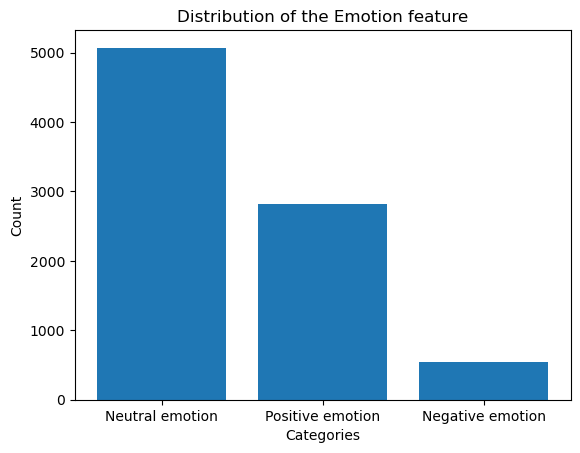

In [28]:
plot_bar('emotion')

##### Observation
The distribution shows a huge class imbalance between categories. The Neutral Emotion category holds over 50% of the data.

### 5.2. Distribution of the *product* feature

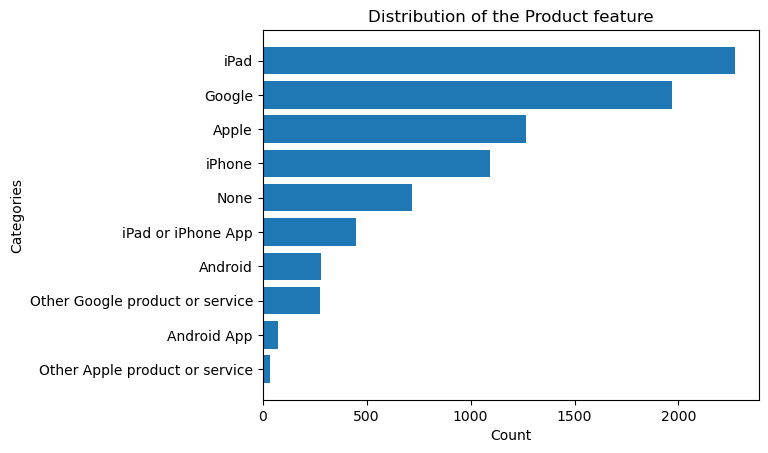

In [29]:
plot_bar('product', plot='barh')

##### Observation
The data reveals there was a lot of sentiments concerning the iPad in the period, followed closely by the Google and Apple company.

The data has a 'None' category meaning that it did not concern the Apple or Google products originally set out at the start of the project.

## 6.0 **Text Preprocessing**

In [30]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english') + ['sxsw', 'sxswi', 'link', 'rt'])
lemmatizer = WordNetLemmatizer()

def lemmatize_tweet(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (keep the text after the #)
    text = re.sub(r'#', '', text)
    # Remove special characters like "&quot;"
    text = re.sub(r'&\w+;', '', text)
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenize text
    tokens = re.split('\W+', text.lower())
    # Remove stopwords and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Remove extra white spaces
    tokens = [word.strip() for word in tokens if word.strip() != '']
    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]
    # Tag parts of speech
    pos_tags = nltk.pos_tag(tokens)
    # Filter tokens to retain only nouns, adjectives, verbs, and adverbs
    important_pos = {'NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'RB', 'RBR', 'RBS'}
    tokens = [word for word, tag in pos_tags if tag in important_pos]
    return tokens

# Apply the clean_text function to the 'tweet' column
df['lemmatized_tweet'] = df['tweet'].apply(lambda x: lemmatize_tweet(x))

def join_text(tokens):
    """
    This function takes a list of tokens (words) and returns them as a single string.
    Each token is separated by a space.

    Parameters:
    tokens (list of str): A list of tokens to be joined.

    Returns:
    str: The tokens joined into a single string separated by spaces.
    """
    return " ".join(tokens)

df['clean_tweet'] = df['lemmatized_tweet'].apply(lambda x: join_text(x))

# Print the cleaned tweets
df.head()


,tweet,product,emotion,lemmatized_tweet,clean_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[iphone, hr, tweeting, riseaustin, dead, need,...",iphone hr tweeting riseaustin dead need upgrad...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[know, awesome, ipadiphone, app, youll, likely...",know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[wait, ipad, also, sale]",wait ipad also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[hope, year, festival, isnt, crashy, year, iph...",hope year festival isnt crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[great, stuff, fri, mayer, google, tim, oreill...",great stuff fri mayer google tim oreilly tech ...


### ***Visual for Lemmatized Tweets***

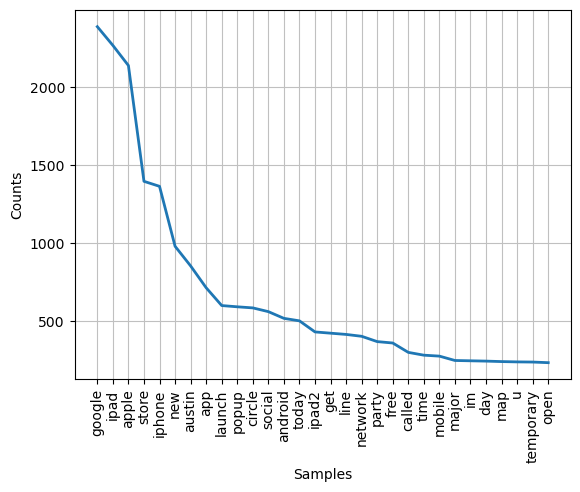

<Axes: xlabel='Samples', ylabel='Counts'>

In [31]:
from nltk.probability import FreqDist

lemmatized_tweet = df['lemmatized_tweet']

# Flatten the list
flattened_lemmatized_tweet = [token for sublist in lemmatized_tweet for token in sublist]

# Create the frequency distribution
fdist = FreqDist(flattened_lemmatized_tweet)

# Plot the frequency distribution
fdist.plot(30)

### ***Creating Bigrams***

Analyzing bigrams improves context understanding by considering pairs of words together, which helps in understanding phrases that might have specific meanings different from their individual words.

In [32]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


# Alias for BigramAssocMeasures
bigram_measures = BigramAssocMeasures()

# Create BigramCollocationFinder
finder = BigramCollocationFinder.from_words(flattened_lemmatized_tweet)

# Score bigrams by raw frequency
scored = finder.score_ngrams(bigram_measures.raw_freq)

# Display the 20 most common bigrams
for bigram, score in scored[:20]:
    print(bigram, score)

('apple', 'store') 0.007471929777323029
('social', 'network') 0.005237082312393979
('new', 'social') 0.004765879533643878
('popup', 'store') 0.00437545437410808
('google', 'launch') 0.0037561592934650906
('called', 'circle') 0.0036215299281079187
('network', 'called') 0.0036215299281079187
('iphone', 'app') 0.003554215245429333
('major', 'new') 0.0032580306416435554
('launch', 'major') 0.0031234012762863836
('apple', 'opening') 0.0028002907994291713
('google', 'circle') 0.002598346751393414
('apple', 'popup') 0.0025579579417862623
('possibly', 'today') 0.0025579579417862623
('circle', 'possibly') 0.002544495005250545
('store', 'austin') 0.002517569132179111
('temporary', 'store') 0.0023425509572147876
('downtown', 'austin') 0.0022213845283933333
('google', 'map') 0.002154069845714747
('store', 'downtown') 0.0020867551630361614


### ***Word Cloud Visual***

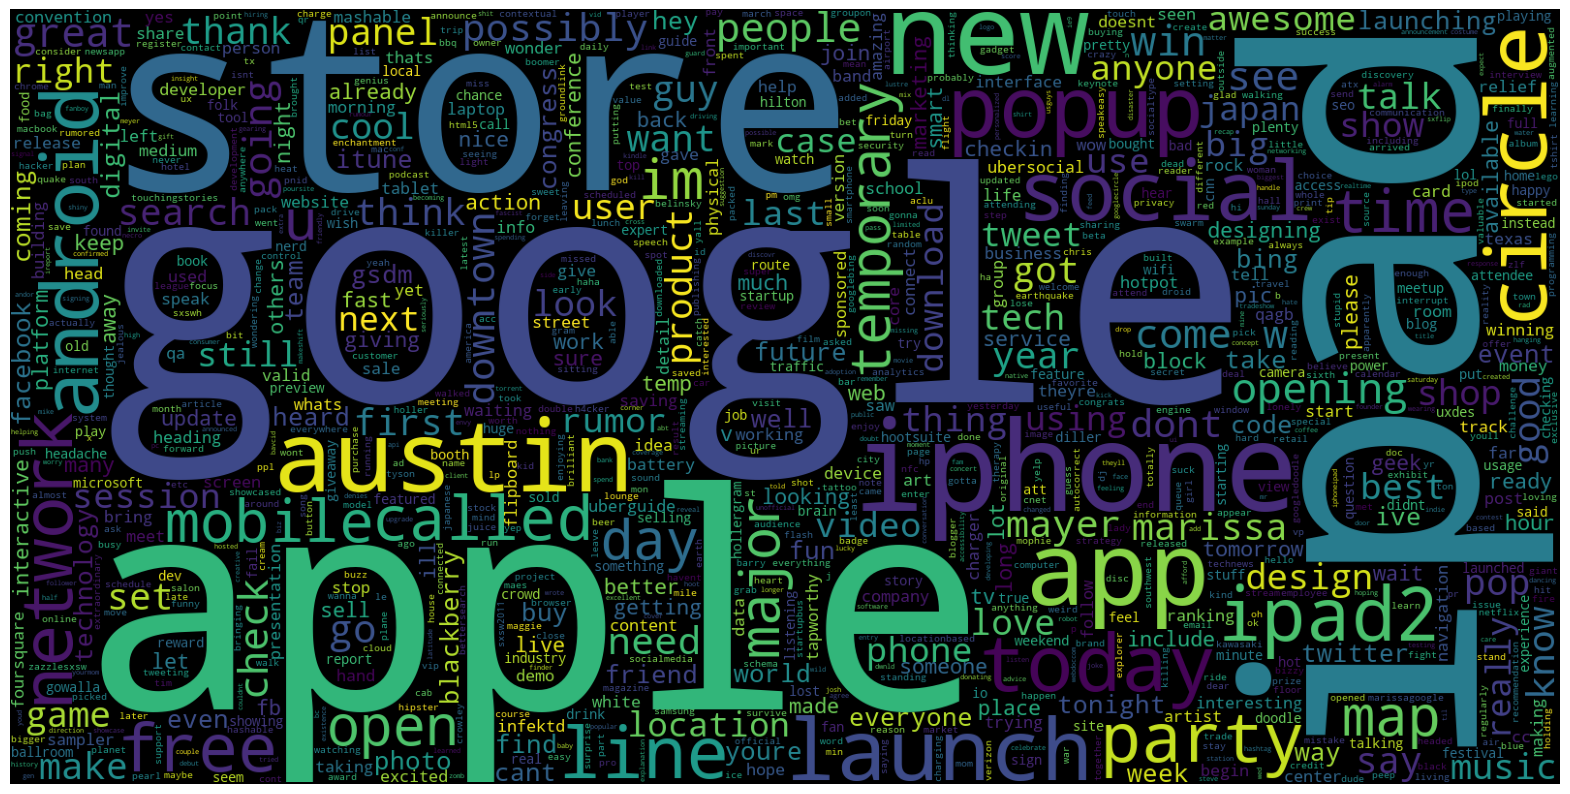

In [33]:
# !pip install wordcloud

from wordcloud import WordCloud

# Use all processed text directly
data_neg = flattened_lemmatized_tweet[:len(flattened_lemmatized_tweet)]

# Create the word cloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))

# Display the word cloud
plt.imshow(wc)
plt.axis('off')  # Hide axes
plt.show()